<a href="https://colab.research.google.com/github/meagvo/SEO/blob/main/Google_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health Awareness Month Google Trends Analysis

May is [Mental Health Awareness month](https://www.nami.org/Get-Involved/Awareness-Events/Mental-Health-Awareness-Month), and because of that, I chose to write about a data science project related to mental health. This tutorial will go through the process of analyzing Google Trends data related to Eating Disorders. 

#Connecting to Pytrends

The first step in this analysis is to installe the appropriate packages. In this case, we need pytrends, which is the connection to [Google Trends](https://trends.google.com/trends/?geo=US) data.

In [ ]:
!pip install pytrends

Next, we must import that pandas library to allow us to work with the dataframes. Then, we initiate a pytrend function.

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

The next step is to build a keyword list that you want to investigate. In this case we are looking at keywords related to Eating Disorder recovery and/or awareness. This is a sample of five basic keywords as a starting point. We define the pytrend all by calling in the keyword list and setting the time frame - in this case the past five years.

In [ ]:
kw_list = ['eating disorder treatment', 'anorexia recovery', 'eating disorder awareness', 'bulimia treatment', 'residential eating disorder treatment']
pytrend.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

Next, we creat a dataframe with the interest over time. I call this dataframe "df" just to keep things simple, but you can call it whatever you want.

In [ ]:
df=pytrend.interest_over_time()

Now I just want to see the first ten rows of the dataframe, so I call the head function. This will display the data for each of the keywords in a table format.

In [ ]:
df.head()


,eating disorder treatment,anorexia recovery,eating disorder awareness,bulimia treatment,residential eating disorder treatment,isPartial
date,,,,,,
2016-05-08,46,11,8,19,0,False
2016-05-15,46,30,0,22,0,False
2016-05-22,53,22,0,11,6,False
2016-05-29,33,42,14,11,3,False
2016-06-05,58,22,6,6,0,False


## What Does This Mean?

Now, what exactly do all these numbers mean? In a previous Medium article by [Simon Rogers](https://medium.com/google-news-lab/what-is-google-trends-data-and-what-does-it-mean-b48f07342ee8) a brief explanation of Google Trends data was given. Basically, the interest scores go from 0 to 100 and this demonstrates the level of engagement in Google searches related to that specific keyword. Therefore, the higher the interest, the more searches, which would be beneficial to know for SEO campaigns or other marketing campaigns for a company. Lets graph out some of the interest trends over time in the next few steps, to show how the interest in different Eating Disorder keywords has changed. To start, we will import numpy and matplotlib for graphing the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = df.drop(labels=['isPartial'],axis='columns')
data.to_csv('MentalHealthGoogleTrends.csv', encoding='utf_8_sig')

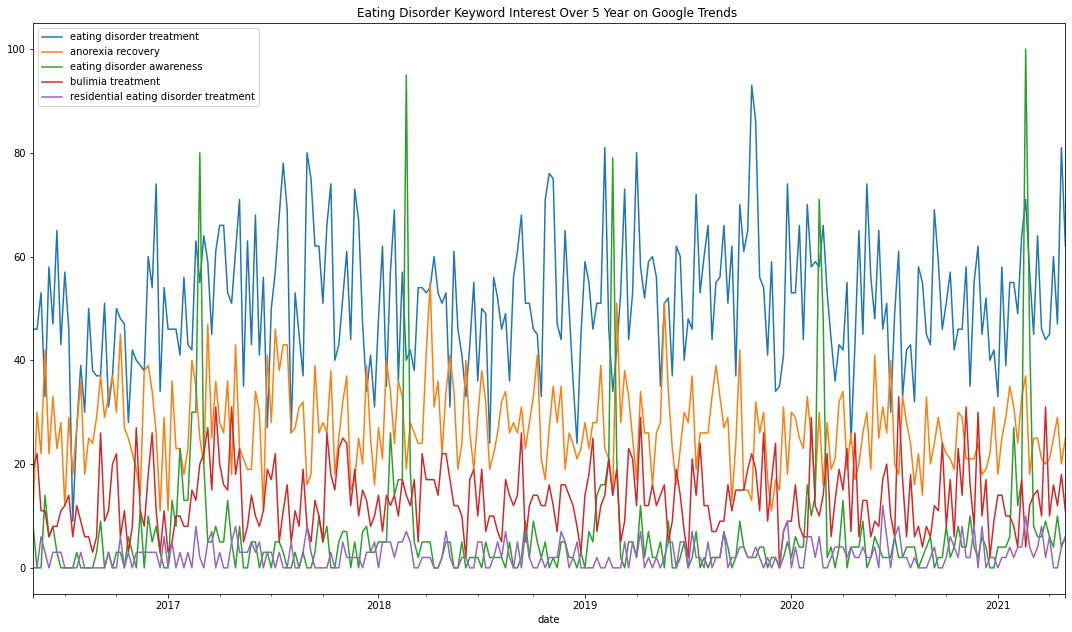

In [ ]:

image = data.plot(title = 'Eating Disorder Keyword Interest Over 5 Year on Google Trends ')

fig = image.get_figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('GoogleTrends.png')


## Interest in ED Recovery Over the Past Five Years

The plot above shows that interest (at least in the eyes of Google) has fluctuated related to Eating Disorder recovery keywords for the past five years. As we can see, "Eating Disorder Treatment" is by far the most popular search. Surprisingly, although it increased in 2017, it came back down in 2018. It appears to cycle like a trend, which is fascinating considering the rates of ED are increasing in today's day and age. 

Another interesting finding is that "residential eating disorder treatment" has the lowest search interest. As someone who has searched for ED treatment, I know that after outpatient treatment, residential is often the next step. In addition, finding the right residential facilitiy takes a lot of time and research, so it is interesting that not many people are searching for this term today.

### Next Steps

Now that we have the trends for some of the keywords we started with intuitively, it is time to find related keywords to the top trending keyword ( Eating Disorder Treatment). We will initiate the pytrend payload with our top keyword of interest, and then run a relatec queries search.

In [ ]:
pytrend.build_payload(kw_list=['Eating Disorder Treatment'])
related_queries = pytrend.related_queries()

Next, we call the values that we just pulled.

In [ ]:
related_queries.values()


dict_values([{'top':                                      query  value
0            treatment for eating disorder    100
1                             binge eating     75
2          binge eating disorder treatment     74
3                    binge eating disorder     71
4                         eating disorders     56
5               eating disorders treatment     54
6         eating disorder treatment center     41
7        eating disorder treatment centers     39
8                       anorexia treatment     29
9        eating disorder treatment near me     29
10     inpatient eating disorder treatment     28
11                                anorexia     27
12     treatment for binge eating disorder     24
13   eating disorder residential treatment     22
14      treatment of binge eating disorder     17
15          best eating disorder treatment     16
16                         bulimia nervosa     12
17              what is an eating disorder     11
18                        ano

From this chart, we can see that the top keyword is "treatment for eating disorder". However, if we look under the rising category, we see that "inpatient eating disorder treatment near me" is becoming more popular.

## Related Topics
Now we will look at related topics. This follows a similar protocol, but will return the overarching topics related to "eating disorder treatment".

In [ ]:
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value  ...               topic_type
0   36050  ...                Computing
1   25500  ...                    Topic
2   25400  ...                    Topic
3   20700  ...                    Topic
4   20600  ...           Field of study
5   20100  ...                 Disorder
6   15450  ...                    Topic
7   14750  ...  Capital of South Africa
8   10000  ...                    Topic
9    1000  ...          City in Georgia
10    850  ...                  Website
11    600  ...                  Company
12    500  ...                  Company
13    400  ...                    Topic
14    350  ...                 US State
15    350  ...                    Topic
16    300  ...                    Topic
17    300  ...                 Disorder
18    250  ...             City in Ohio
19    120  ...                 US State
20    120  ...                     Mood
21    110  ...                    Topic
22    100  ...                    Topic
23     90  ...  

As we can see, the rising topics are not necessarily related to our keyword of interest. However, the "top" topics are definitely not related to what we're looking at. This shows that sometimes the Google Trends data needs to be taken with caution.

## Conclusion
This was just an introduction to what you can do with pytrends. By looking at the Google Trends data related to Eating Disorder treatment, we have gained useful insights. For instance, if this were a marketing agency for National Eating Disorder Association (NEDA) [link text](https://www.nationaleatingdisorders.org/), these insights could be applied to their paid and organic search strategies.